In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/retail_combined.csv")
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [ ]:
df.shape

(1067371, 8)

In [ ]:
df.describe()

,Quantity,Price,Customer ID
count,1.067371e+06,1.067371e+06,824364.000000
mean,9.938898e+00,4.649388e+00,15324.638504
std,1.727058e+02,1.235531e+02,1697.464450
min,-8.099500e+04,-5.359436e+04,12346.000000
25%,1.000000e+00,1.250000e+00,13975.000000
50%,3.000000e+00,2.100000e+00,15255.000000
75%,1.000000e+01,4.150000e+00,16797.000000
max,8.099500e+04,3.897000e+04,18287.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [ ]:
#Data preprocess
df_dedup = df.copy()

#Feature Engineering - Adding TotalSales and IsCancelled columns and taking non-negative Price.
df['TotalSales'] = df['Quantity'] * df['Price']
df['IsCancelled'] = df['Invoice'].astype(str).str.startswith('C')
df = df[df['Price'] > 0].copy()

#remove duplicate from data
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

df.drop_duplicates(inplace=True)
print(f"DataFrame size after dropping duplicates: {len(df)}")


Number of duplicate rows: 34147
DataFrame size after dropping duplicates: 1027017


###Feature Engineering

In [ ]:
df_model = df.copy()

In [ ]:
df_model['InvoiceDate'] = pd.to_datetime(df_model['InvoiceDate'],
                                        format='mixed',
                                        dayfirst=True,
                                        errors='coerce')

In [ ]:
df_model['InvoiceYearMonth'] = df_model['InvoiceDate'].map(lambda date: 100*date.year + date.month)
df_model.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalSales,IsCancelled,InvoiceYearMonth
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,False,200912
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,False,200912
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,False,200912
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,False,200912
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,False,200912


In [ ]:
#add  revenue column

df_model['Revenue'] = df_model.Price * df_model.Quantity
df_model.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalSales,IsCancelled,InvoiceYearMonth,Revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,False,200912,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,False,200912,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,False,200912,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,False,200912,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,False,200912,30.0


In [ ]:
#monthwise revenue for every year

ctm_revenue = df_model.groupby('InvoiceYearMonth').Revenue.sum().reset_index()
ctm_revenue


,InvoiceYearMonth,Revenue
0,200912,796648.500
1,201001,622479.502
2,201002,531265.366
3,201003,763247.241
4,201004,641521.052
5,201005,613270.720
6,201006,677073.870
7,201007,617365.480
8,201008,654774.390
9,201009,851105.961


In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
df_dedup = df_model.copy()
#data transformation for invoice date to convert into date time
df_dedup['InvoiceDate'] = pd.to_datetime(df_dedup['InvoiceDate'],
                                        format='mixed',
                                        dayfirst=True,
                                        errors='coerce')

print(f"Initial row count after duplicates removed: {len(df_dedup)}")

# 1. Outlier Identification using Z-Score
df_dedup['TotalSales_ZScore'] = np.abs(stats.zscore(df_dedup['TotalSales']))
df_dedup['Quantity_ZScore'] = np.abs(stats.zscore(df_dedup['Quantity']))

# 2. Remove extreme outliers with z-score less than 3 from quatity or totalsales.
df_clean_stats = df_dedup[
    (df_dedup['TotalSales_ZScore'] <= 3) &
    (df_dedup['Quantity_ZScore'] <= 3)
].copy()

#checking impact of outliers by comparing datasets
outliers_removed = len(df_dedup) - len(df_clean_stats)
print(f"Number of extreme outliers removed (Z-Score > 3 in TotalSales or Quantity): {outliers_removed}")
print(f"Row count of the clean statistical dataset: {len(df_clean_stats)}")

df_dedup.drop(columns=['TotalSales_ZScore', 'Quantity_ZScore'], inplace=True)
df_clean_stats.drop(columns=['TotalSales_ZScore', 'Quantity_ZScore'], inplace=True)
df_clean_stats.to_csv("online_retail_clean_stats.csv", index=False)

Initial row count after duplicates removed: 1027017
Number of extreme outliers removed (Z-Score > 3 in TotalSales or Quantity): 1834
Row count of the clean statistical dataset: 1025183


/tmp/ipython-input-3581258793.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valid_sales['ZScore'] = np.abs(stats.zscore(df_valid_sales['TotalSales']))


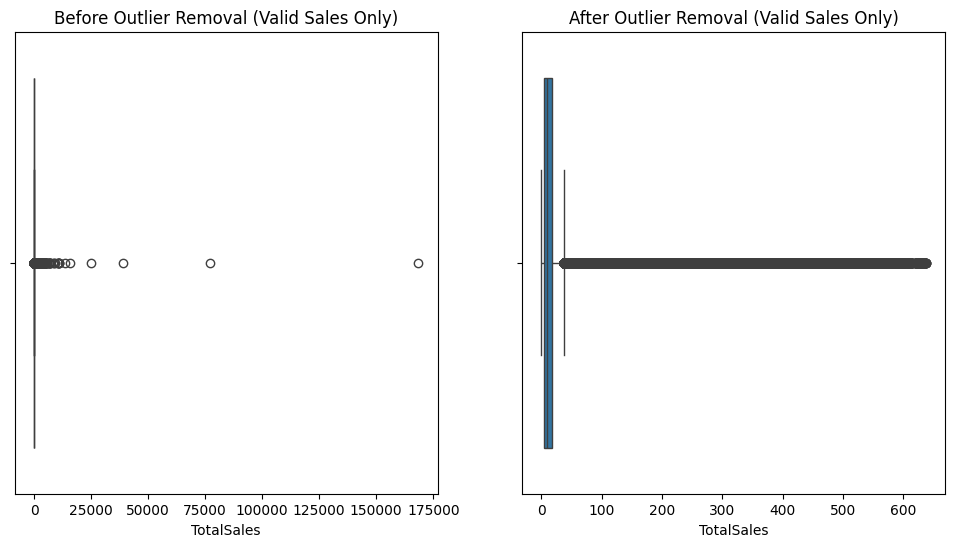

In [ ]:
# Filter only positive, non-cancelled sales
df_valid_sales = df_dedup[(df_dedup['IsCancelled'] == False) & (df_dedup['TotalSales'] > 0)]

# Remove outliers
df_valid_sales['ZScore'] = np.abs(stats.zscore(df_valid_sales['TotalSales']))
df_valid_sales_no_outliers = df_valid_sales[df_valid_sales['ZScore'] <= 3]
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.boxplot(x=df_valid_sales['TotalSales'])
plt.title('Before Outlier Removal (Valid Sales Only)')

plt.subplot(1,2,2)
sns.boxplot(x=df_valid_sales_no_outliers['TotalSales'])
plt.title('After Outlier Removal (Valid Sales Only)')

plt.show()


--- Summary Statistics (After Outlier Removal) ---
|            | mean   | median   | std   | var     | skew   |
|:-----------|:-------|:---------|:------|:--------|:-------|
| Quantity   | 9.30   | 3.00     | 23.52 | 553.41  | 8.31   |
| Price      | 3.83   | 2.10     | 13.60 | 184.85  | 35.23  |
| TotalSales | 17.38  | 9.95     | 39.89 | 1591.10 | 7.27   |

--- Correlation Matrix (After Outlier Removal) ---
|            | Quantity   | Price   | TotalSales   |
|:-----------|:-----------|:--------|:-------------|
| Quantity   | 1.00       | -0.06   | 0.64         |
| Price      | -0.06      | 1.00    | 0.15         |
| TotalSales | 0.64       | 0.15    | 1.00         |


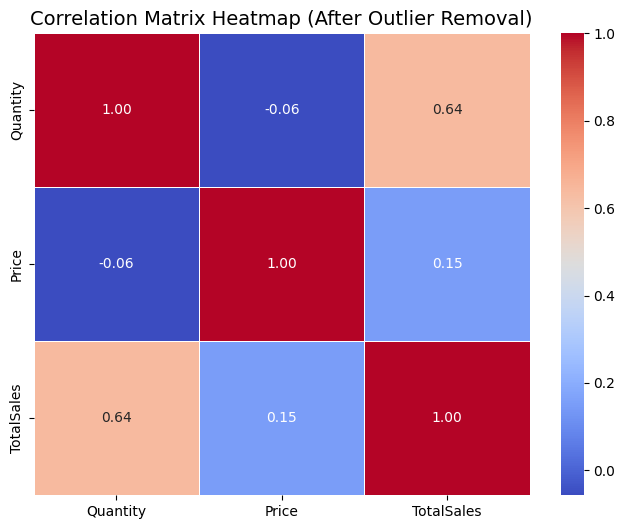

In [ ]:
#basic stats on clean dataset
df_stats = pd.read_csv("online_retail_clean_stats.csv")
num_cols = ['Quantity', 'Price', 'TotalSales']

# 1. Compute Summary Statistics
summary_df = df_stats[num_cols].agg(
    ['mean', 'median', 'std', 'var', 'skew']
).T

print("\n--- Summary Statistics (After Outlier Removal) ---")
print(summary_df.to_markdown(numalign="left", stralign="left", floatfmt=".2f"))

# 2. Compute Correlation Matrix
corr_matrix = df_stats[num_cols].corr()

print("\n--- Correlation Matrix (After Outlier Removal) ---")
print(corr_matrix.to_markdown(numalign="left", stralign="left", floatfmt=".2f"))

plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=0.5,
    cbar=True          )
plt.title("Correlation Matrix Heatmap (After Outlier Removal)", fontsize=14)
plt.show()

In [ ]:
df_clean_stats.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalSales,IsCancelled,InvoiceYearMonth,Revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,False,200912,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,False,200912,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,False,200912,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,False,200912,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,False,200912,30.0


In [ ]:
df_clean_stats.shape

(1025183, 12)

In [ ]:
from sklearn.preprocessing import StandardScaler

#dataset for modeling ready features
df_scaled = df_clean_stats.copy()

#1. Log Transformation on positive value
df_scaled['Log_TotalSales'] = np.log(df_scaled['TotalSales'])
df_scaled['Log_Price'] = np.log(df_scaled['Price'])
df_scaled['Log_Quantity'] = np.log(df_scaled['Quantity'])
df_scaled['Log_Revenue'] = np.log(df_scaled['Revenue'])

#2. Standardization scaling
feat_to_scale = ['Quantity', 'Price', 'TotalSales', 'Revenue']
scaler = StandardScaler()
df_scaled[feat_to_scale] = scaler.fit_transform(df_scaled[feat_to_scale])

print("\n--- Standardized and Log-Transformed Features (Snippet) ---")
print(df_scaled[['Log_TotalSales', 'TotalSales', 'Price', 'Revenue']].head().to_markdown(numalign="left", stralign="left", floatfmt=".2f"))

#data used for modeling
df_scaled.to_csv("online_retail_model_ready.csv", index=False)

/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)



--- Standardized and Log-Transformed Features (Snippet) ---
|    | Log_TotalSales   | TotalSales   | Price   | Revenue   |
|:---|:-----------------|:-------------|:--------|:----------|
| 0  | 4.42             | 1.66         | 0.23    | 1.66      |
| 1  | 4.39             | 1.59         | 0.21    | 1.59      |
| 2  | 4.39             | 1.59         | 0.21    | 1.59      |
| 3  | 4.61             | 2.09         | -0.13   | 2.09      |
| 4  | 3.40             | 0.32         | -0.19   | 0.32      |


In [ ]:
df_scaled.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalSales,IsCancelled,InvoiceYearMonth,Revenue,Log_TotalSales,Log_Price,Log_Quantity,Log_Revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,0.114970,2009-12-01 07:45:00,0.229257,13085.0,United Kingdom,1.655122,False,200912,1.655122,4.423648,1.938742,2.484907,4.423648
1,489434,79323P,PINK CHERRY LIGHTS,0.114970,2009-12-01 07:45:00,0.214547,13085.0,United Kingdom,1.594954,False,200912,1.594954,4.394449,1.909543,2.484907,4.394449
2,489434,79323W,WHITE CHERRY LIGHTS,0.114970,2009-12-01 07:45:00,0.214547,13085.0,United Kingdom,1.594954,False,200912,1.594954,4.394449,1.909543,2.484907,4.394449
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",1.645278,2009-12-01 07:45:00,-0.127470,13085.0,United Kingdom,2.091337,False,200912,2.091337,4.613138,0.741937,3.871201,4.613138
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,0.625073,2009-12-01 07:45:00,-0.189990,13085.0,United Kingdom,0.316393,False,200912,0.316393,3.401197,0.223144,3.178054,3.401197


##Visualization

In [ ]:
# importing necessary Python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
# plot line plot for monthly revenue

line_fig = px.line(ctm_revenue,
                   x = "InvoiceYearMonth",
                   y = "Revenue",
                   title = "1. Montly Revenue according to years",
                   markers=True
                  )

line_fig.update_layout(title_x=0.5,
                       showlegend=False,
                       xaxis={"type": "category"},
                       xaxis_title="Invoice Year-Month",
                       yaxis_title="Monthly Revenue"
                      )

line_fig.show(config={'displaylogo': False})

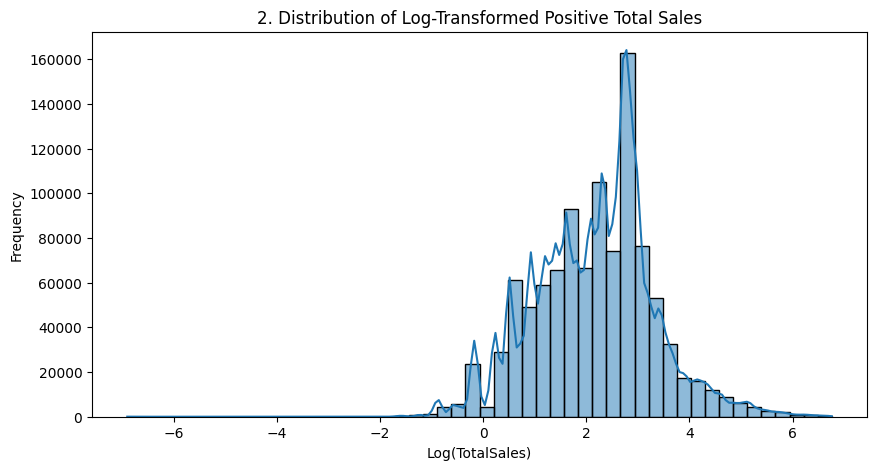

In [ ]:
 #log transformed total sales
#2: Distribution of Log-Transformed Positive Total Sales ---
plt.figure(figsize=(10, 5))
sns.histplot(df_model['Log_TotalSales'], kde=True, bins=50)
plt.title('2. Distribution of Log-Transformed Positive Total Sales')
plt.xlabel('Log(TotalSales)')
plt.ylabel('Frequency')
plt.savefig('viz1_log_total_sales_distribution.png')
plt.show()

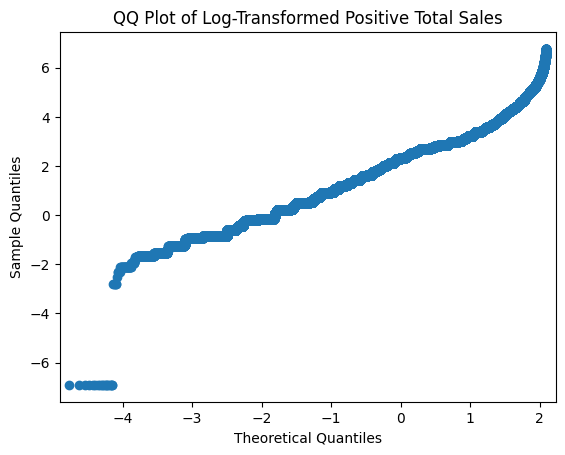

In [ ]:
# QQ Plot for Log-Transformed TotalSales
import statsmodels.api as sm
from scipy import stats

sm.qqplot(df_model['Log_TotalSales'], line='s')
plt.title('QQ Plot of Log-Transformed Positive Total Sales')
plt.savefig('viz2_log_total_sales_qqplot.png')
plt.show()
plt.close()

In [ ]:
product_quantity = df_model.groupby('Description')['Quantity'].sum().reset_index()
product_quantity.rename(columns={'Quantity': 'TotalQuantity'}, inplace=True)

#Select top 10 products by quantity
top_prod_df = product_quantity.nlargest(10, 'TotalQuantity').reset_index(drop=True)

#3: Top 10 Best-Selling Products by Quantity using tree map

treemap_fig = px.treemap(
    top_prod_df,
    path=['Description'],
    values='TotalQuantity',
    color='TotalQuantity',
    color_continuous_scale='Sunset',
    title="3. Top 10 Best-Selling Products by Total Quantity Sold (Treemap)",
    hover_data=['TotalQuantity']
)

treemap_fig.update_layout(
    title_x=0.5,
    margin = dict(t=50, l=25, r=25, b=25)
)
treemap_fig.show(config={'displaylogo': False})
# Save the figure as JSON
treemap_fig.write_json("viz17_top10_products_treemap.json")

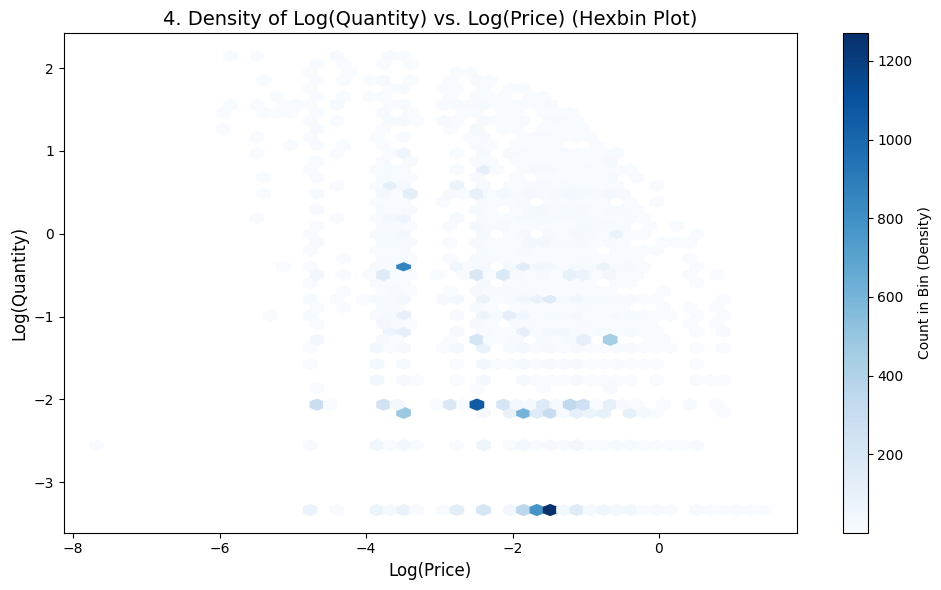

In [ ]:
#4. Log tranfromation for Quantity and Price to see the relationship between both

df_model['Log_Quantity'] = np.log(df_model['Quantity'])
df_model['Log_Price'] = np.log(df_model['Price'])

plt.figure(figsize=(10, 6))
plt.hexbin(
    df_model['Log_Price'],
    df_model['Log_Quantity'],
    gridsize=50,
    cmap='Blues',
    mincnt=1
)

cb = plt.colorbar(label='Count in Bin (Density)')
plt.title('4. Density of Log(Quantity) vs. Log(Price) (Hexbin Plot)', fontsize=14)
plt.xlabel('Log(Price)', fontsize=12)
plt.ylabel('Log(Quantity)', fontsize=12)
plt.tight_layout()
plt.show()
plt.savefig('viz19_log_quantity_vs_log_price_hexbin.png')
plt.close()

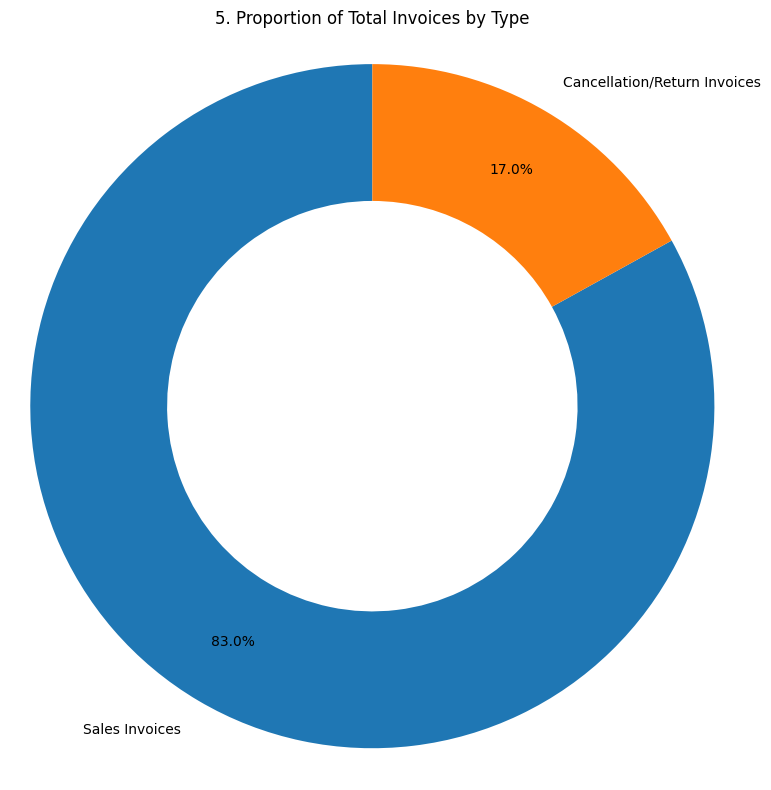

In [ ]:
# 5. Proportion of Cancellations vs. Sales (Donut Chart)
total_invoices = df_model['Invoice'].nunique()
cancellation_invoices = df_model[df_model['IsCancelled'] == True]['Invoice'].nunique()
sales_invoices = total_invoices - cancellation_invoices
data = [sales_invoices, cancellation_invoices]
labels = ['Sales Invoices', 'Cancellation/Return Invoices']
plt.figure(figsize=(8, 8))
plt.pie(data, labels=labels, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4), pctdistance=0.8)
plt.title('5. Proportion of Total Invoices by Type')
plt.axis('equal')
plt.tight_layout()
plt.savefig('viz9_cancellation_vs_sales_proportion.png')
plt.show()
plt.close()

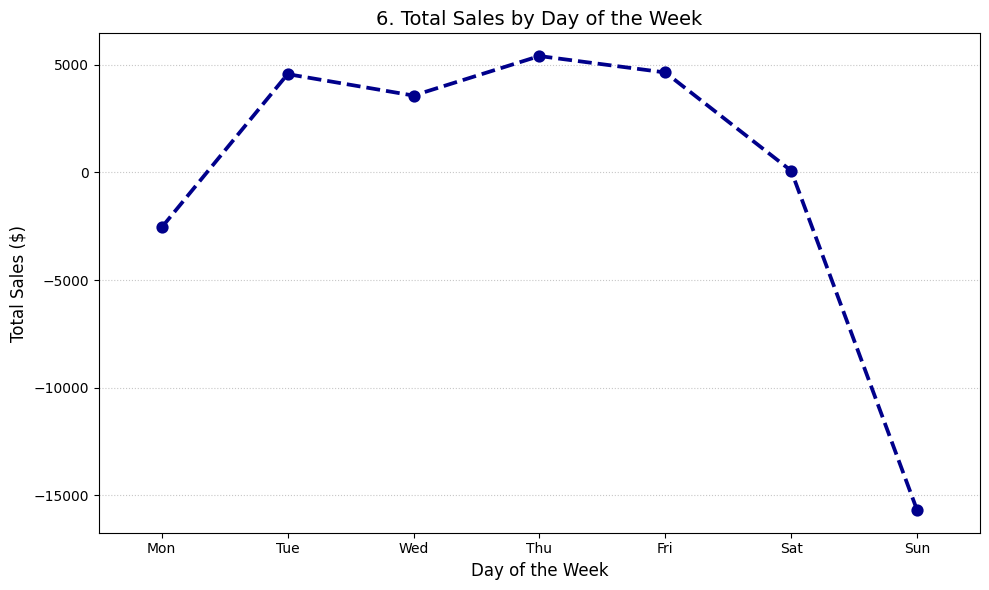

In [ ]:
df_model['InvoiceDate'] = pd.to_datetime(df_model['InvoiceDate'], errors='coerce')

df_model['DayOfWeek'] = df_model['InvoiceDate'].dt.dayofweek
day_map = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
df_model['DayOfWeekName'] = df_model['DayOfWeek'].map(day_map)

#calc sales per day
sales_by_day = df_model.groupby('DayOfWeekName')['TotalSales'].sum().reindex(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']).reset_index()
sales_by_day.columns = ['DayOfWeekName', 'TotalSales']

# 6: Total Sales by Day of the Week using point plot

plt.figure(figsize=(10, 6))

sns.pointplot(
    x='DayOfWeekName',
    y='TotalSales',
    data=sales_by_day,
    color='darkblue',
    linestyles='--', #add dashed line
    markers='o'
)

plt.title('6. Total Sales by Day of the Week', fontsize=14)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.grid(axis='y', alpha=0.7, linestyle=':')
plt.tight_layout()
plt.savefig('viz18_sales_by_day_of_week_pointplot.png')
plt.show()
plt.close()

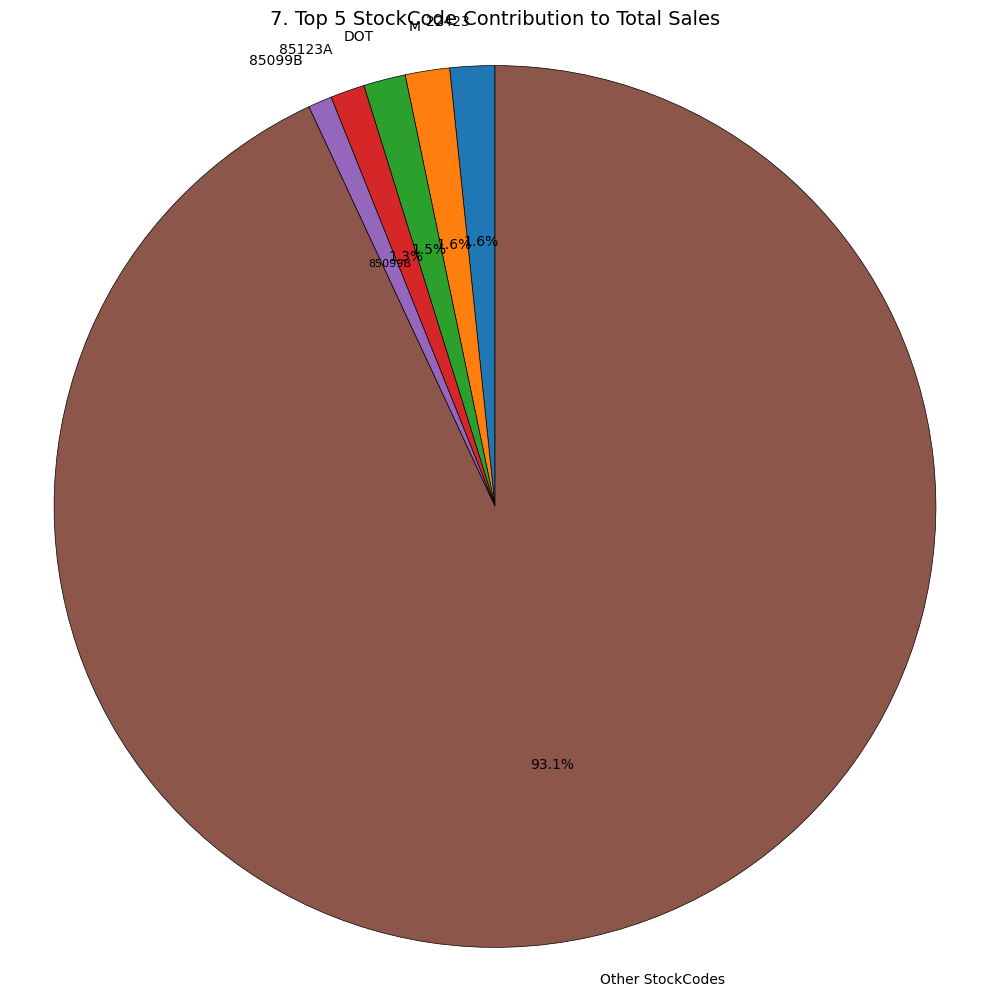

In [ ]:
df_positive_sales = df_dedup[df_dedup['TotalSales'] > 0].copy()
calc_top_5_stock_codes = df_positive_sales.groupby('StockCode')['TotalSales'].sum().nlargest(5)
other_sales = df_positive_sales['TotalSales'].sum() - calc_top_5_stock_codes.sum()
sales_data = calc_top_5_stock_codes.to_list() + [other_sales]
labels = calc_top_5_stock_codes.index.to_list() + ['Other StockCodes']
percent = [f'{s/df_positive_sales["TotalSales"].sum()*100:.1f}%' for s in sales_data]
plt.figure(figsize=(10, 10))
wedges, texts, autotexts = plt.pie(
    sales_data,
    labels=labels,
    autopct=lambda p: '{:.1f}%'.format(p) if p > 1 else '',
    startangle=90,
    textprops={'fontsize': 10},
    wedgeprops={'edgecolor': 'black', 'linewidth': 0.5},
)
for i, text in enumerate(autotexts):
    if sales_data[i] / df_positive_sales['TotalSales'].sum() < 0.01:
        text.set_text(labels[i])
        text.set_fontsize(8)

plt.title('7. Top 5 StockCode Contribution to Total Sales', fontsize=14)
plt.axis('equal')
plt.tight_layout()
plt.savefig('viz14_top5_stockcode_contribution_FIXED.png')
plt.show()
plt.close()

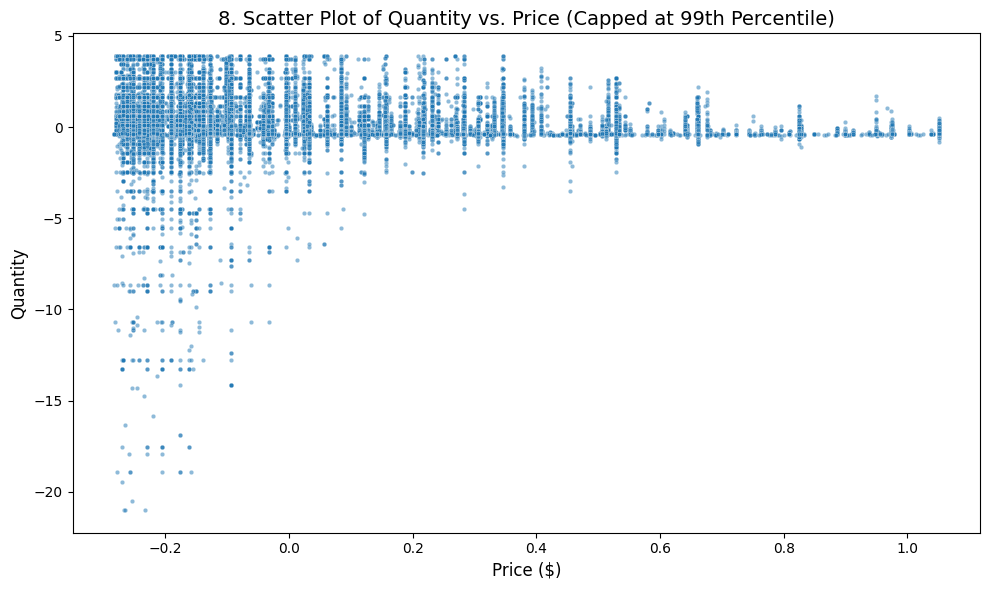

In [ ]:
# 8. Scatter Plot of Quantity vs. Price
qty_cap = df_model['Quantity'].quantile(0.99)
price_cap_scatter = df_model['Price'].quantile(0.99)
df_scatter = df_model[(df_model['Quantity'] <= qty_cap) & (df_model['Price'] <= price_cap_scatter)].copy()
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price', y='Quantity', data=df_scatter, alpha=0.5, s=10)
plt.title('8. Scatter Plot of Quantity vs. Price (Capped at 99th Percentile)', fontsize=14)
plt.xlabel('Price ($)', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.tight_layout()
plt.savefig('viz15_qty_vs_price_scatter_capped.png')
plt.show()
plt.close()

In [ ]:
total_quantity_sold = df_model['Quantity'].sum()

product_quantity = df_model.groupby(['StockCode', 'Description'])['Quantity'].sum().reset_index()
product_quantity.rename(columns={'Quantity': 'TotalQuantity'}, inplace=True)

product_quantity['Percentage'] = (product_quantity['TotalQuantity'] / total_quantity_sold) * 100

# Select top 10 products by percentage
top_products_df = product_quantity.nlargest(10, 'Percentage').reset_index(drop=True)

#9: Individual product quantity percentage

bar_fig = px.bar(top_products_df,
                 x="StockCode",
                 y="Percentage",
                 color="Description",
                 title="16. Individual Product Quantity Percentage (Top 10)",
                 labels={"Percentage": "Quantity Percentage (%)", "StockCode": "Stock Code"},
                 hover_data=['Description', 'TotalQuantity']
                )

bar_fig.update_layout(title_x=0.5, title_y=0.8,
                      legend_title="Description",
                      legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
                      uniformtext_minsize=8,
                      uniformtext_mode='hide'
                     )

bar_fig.show(config={'displaylogo': False})

<a id='rfm_analysis'></a>
# RFM Analysis

In this section we will see some analysis of customers ans bacis RFM analysis.
RFM analysis: is a marketing technique used to quantitatively rank and group customers based on the `recency, frequency and monetary` total of their recent transactions to `identify the best customers and perform targeted marketing campaigns`.


## Top Customers
Calculate how often did particular customer make purchase during the year

In [ ]:
df_data = df_scaled

In [ ]:
df_data.rename(columns={'Invoice':'InvoiceNo', 'Customer ID':'CustomerID', 'Price':'UnitPrice'}, inplace=True)
df_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,IsCancelled,InvoiceYearMonth,Revenue,Log_TotalSales,Log_Price,Log_Quantity,Log_Revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,0.114970,2009-12-01 07:45:00,0.229257,13085.0,United Kingdom,1.655122,False,200912,1.655122,4.423648,1.938742,2.484907,4.423648
1,489434,79323P,PINK CHERRY LIGHTS,0.114970,2009-12-01 07:45:00,0.214547,13085.0,United Kingdom,1.594954,False,200912,1.594954,4.394449,1.909543,2.484907,4.394449
2,489434,79323W,WHITE CHERRY LIGHTS,0.114970,2009-12-01 07:45:00,0.214547,13085.0,United Kingdom,1.594954,False,200912,1.594954,4.394449,1.909543,2.484907,4.394449
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",1.645278,2009-12-01 07:45:00,-0.127470,13085.0,United Kingdom,2.091337,False,200912,2.091337,4.613138,0.741937,3.871201,4.613138
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,0.625073,2009-12-01 07:45:00,-0.189990,13085.0,United Kingdom,0.316393,False,200912,0.316393,3.401197,0.223144,3.178054,3.401197


In [ ]:
df_data['freq'] = df_data.groupby('CustomerID')['CustomerID'].transform('count')

In [ ]:
# Calculate the top 500 customers who brings the highest revenue
customer  = pd.DataFrame(df_data.groupby(['CustomerID'])['Revenue'].sum().sort_values(ascending=False)).reset_index().head(10)

In [ ]:
customer['CustomerID'].tolist()

[14646.0,
 18102.0,
 14156.0,
 13694.0,
 17511.0,
 12415.0,
 16684.0,
 15061.0,
 15769.0,
 14911.0]

In [ ]:
top_customer = df_data[df_data['CustomerID'].isin(customer['CustomerID'].tolist())][['CustomerID', 'Country', 'Revenue', 'Quantity', 'freq']]

In [ ]:
 # Countries where the top customers resids
top_customer['Country'].unique().tolist()

['United Kingdom', 'EIRE', 'Netherlands', 'Australia']

In [ ]:
df_rfm = df_data
df_rfm.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,IsCancelled,InvoiceYearMonth,Revenue,Log_TotalSales,Log_Price,Log_Quantity,Log_Revenue,freq
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,0.114970,2009-12-01 07:45:00,0.229257,13085.0,United Kingdom,1.655122,False,200912,1.655122,4.423648,1.938742,2.484907,4.423648,92.0
1,489434,79323P,PINK CHERRY LIGHTS,0.114970,2009-12-01 07:45:00,0.214547,13085.0,United Kingdom,1.594954,False,200912,1.594954,4.394449,1.909543,2.484907,4.394449,92.0
2,489434,79323W,WHITE CHERRY LIGHTS,0.114970,2009-12-01 07:45:00,0.214547,13085.0,United Kingdom,1.594954,False,200912,1.594954,4.394449,1.909543,2.484907,4.394449,92.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",1.645278,2009-12-01 07:45:00,-0.127470,13085.0,United Kingdom,2.091337,False,200912,2.091337,4.613138,0.741937,3.871201,4.613138,92.0
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,0.625073,2009-12-01 07:45:00,-0.189990,13085.0,United Kingdom,0.316393,False,200912,0.316393,3.401197,0.223144,3.178054,3.401197,92.0


In [ ]:
print(df_rfm['InvoiceDate'].min())
print(df_rfm['InvoiceDate'].max())

2009-12-01 07:45:00
2011-12-09 12:50:00


In [ ]:
import datetime as dt
presence = dt.datetime(2011,12,10)
df_rfm['InvoiceDate'] = pd.to_datetime(df_rfm['InvoiceDate'])

# Calculate recency, frequency and monetary values:

`Recency (R) as days since last purchase`: How many days ago was their last purchase? Deduct most recent purchase date from today to calculate the recency value. 1 day ago? 14 days ago? 500 days ago?

`Frequency (F) as total number of transactions`: How many times has the customer purchased from our store? For example, if someone placed 10 orders over a period of time, their frequency is 10.

`Monetary (M) as total money spent`: How many $$ (or whatever is your currency of calculation) has this customer spent? Again limit to last two years – or take all time. Simply total up the money from all transactions to get the M value.

In [ ]:
rfm = df_rfm.groupby('CustomerID').agg({'InvoiceDate': lambda x: (presence - x.max()).days, 'InvoiceNo': lambda x: len(x), 'Revenue': lambda x: x.sum()})
rfm['InvoiceDate'] = rfm['InvoiceDate'].astype(int)
rfm.rename(columns={'InvoiceDate': 'recency',
                         'InvoiceNo': 'frequency',
                         'Revenue': 'monetary_value'}, inplace=True)

In [ ]:
rfm.head()


,recency,frequency,monetary_value
CustomerID,,,
12346.0,431,45,-20.903678
12347.0,2,222,26.656174
12348.0,75,51,28.405231
12349.0,18,180,31.994787
12350.0,310,17,0.976425


In [ ]:
# Define quartiles for rfm score:
quantiles = rfm.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

In [ ]:
rfm_segments= rfm

In [ ]:
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def RClass(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FMClass(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

In [ ]:
rfm_segments['R_Quartile'] = rfm_segments['recency'].apply(RClass, args=('recency',quantiles,))
rfm_segments['F_Quartile'] = rfm_segments['frequency'].apply(FMClass, args=('frequency',quantiles,))
rfm_segments['M_Quartile'] = rfm_segments['monetary_value'].apply(FMClass, args=('monetary_value',quantiles,))

In [ ]:
rfm_segments['RFMClass'] = rfm_segments.R_Quartile.map(str) \
                            + rfm_segments.F_Quartile.map(str) \
                            + rfm_segments.M_Quartile.map(str)

In [ ]:
rfm_segments.head()


,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
CustomerID,,,,,,,
12346.0,431,45,-20.903678,4,3,4,434
12347.0,2,222,26.656174,1,1,1,111
12348.0,75,51,28.405231,2,3,1,231
12349.0,18,180,31.994787,1,1,1,111
12350.0,310,17,0.976425,3,4,2,342


In [ ]:
rfm_segments['RFMClass'].unique()


array(['434', '111', '231', '342', '333', '223', '332', '322', '331',
       '211', '121', '123', '441', '142', '422', '221', '311', '443',
       '232', '321', '341', '442', '431', '114', '423', '222', '241',
       '433', '112', '432', '113', '323', '132', '242', '143', '131',
       '133', '421', '214', '213', '411', '124', '314', '224', '312',
       '413', '234', '233', '424', '122', '134', '343', '324', '243',
       '141', '212', '414', '334', '313', '444', '344', '412'],
      dtype=object)

In [ ]:
print("Champions: ",len(rfm_segments[rfm_segments['RFMClass']=='111']), "(", round(len(rfm_segments[rfm_segments['RFMClass']=='111'])/len(rfm_segments)*100,2), "%)")
print('Loyal Customers: ',len(rfm_segments[rfm_segments['F_Quartile']==1]), "(", round(len(rfm_segments[rfm_segments['F_Quartile']==1])/len(rfm_segments)*100,2), "%)")
print("Big Spenders: ",len(rfm_segments[rfm_segments['M_Quartile']==1]), "(", round(len(rfm_segments[rfm_segments['M_Quartile']==1])/len(rfm_segments)*100,2), "%)")
print('About to Sleep: ', len(rfm_segments[rfm_segments['RFMClass']=='322']), "(", round(len(rfm_segments[rfm_segments['RFMClass']=='322'])/len(rfm_segments)*100,2), "%)")
print('Lost Customers: ',len(rfm_segments[rfm_segments['RFMClass']=='444']), "(", round(len(rfm_segments[rfm_segments['RFMClass']=='444'])/len(rfm_segments)*100,2), "%)")

Champions:  285 ( 4.82 %)
Loyal Customers:  1466 ( 24.8 %)
Big Spenders:  1478 ( 25.0 %)
About to Sleep:  58 ( 0.98 %)
Lost Customers:  11 ( 0.19 %)


Form the above calculations we can say that there are total `24.84% of loyal customers` and `25.01% of big spenders`.

### Model Training

In [ ]:
df_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,IsCancelled,InvoiceYearMonth,Revenue,Log_TotalSales,Log_Price,Log_Quantity,Log_Revenue,freq
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,0.114970,2009-12-01 07:45:00,0.229257,13085.0,United Kingdom,1.655122,False,200912,1.655122,4.423648,1.938742,2.484907,4.423648,92.0
1,489434,79323P,PINK CHERRY LIGHTS,0.114970,2009-12-01 07:45:00,0.214547,13085.0,United Kingdom,1.594954,False,200912,1.594954,4.394449,1.909543,2.484907,4.394449,92.0
2,489434,79323W,WHITE CHERRY LIGHTS,0.114970,2009-12-01 07:45:00,0.214547,13085.0,United Kingdom,1.594954,False,200912,1.594954,4.394449,1.909543,2.484907,4.394449,92.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",1.645278,2009-12-01 07:45:00,-0.127470,13085.0,United Kingdom,2.091337,False,200912,2.091337,4.613138,0.741937,3.871201,4.613138,92.0
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,0.625073,2009-12-01 07:45:00,-0.189990,13085.0,United Kingdom,0.316393,False,200912,0.316393,3.401197,0.223144,3.178054,3.401197,92.0


In [ ]:
ctm_bhvr_dt = df_data[(df_data.InvoiceDate < pd.Timestamp(2011,9,1)) &
      (df_data.InvoiceDate >= pd.Timestamp(2009,12,1))].reset_index(drop=True)


ctm_next_quarter = df_data[(df_data.InvoiceDate < pd.Timestamp(2011,12,1)) &
      (df_data.InvoiceDate >= pd.Timestamp(2011,9,1))].reset_index(drop=True)

In [ ]:
# Get the distinct customers in the dataframe ctm_bhvr_dt
ctm_dt = pd.DataFrame(ctm_bhvr_dt['CustomerID'].unique())

# Rename the column to CustomerID.
ctm_dt.columns = ['CustomerID']

ctm_dt.head()
ctm_dt.shape

(5287, 1)

In [ ]:
# Create a dataframe with CustomerID and customers first purchase
# date in ctm_next_quarter
ctm_1st_purchase_in_next_quarter = ctm_next_quarter.groupby('CustomerID').InvoiceDate.min().reset_index()
ctm_1st_purchase_in_next_quarter.columns = ['CustomerID','MinPurchaseDate']
ctm_1st_purchase_in_next_quarter.head()

,CustomerID,MinPurchaseDate
0,12347.0,2011-10-31 12:25:00
1,12348.0,2011-09-25 13:13:00
2,12349.0,2011-11-21 09:51:00
3,12352.0,2011-09-20 14:34:00
4,12356.0,2011-11-17 08:40:00


Let's find the last purchase made by each customer in the dataframe `ctm_bhvr_dt`.

In [ ]:
ctm_last_purchase_bhvr_dt = ctm_bhvr_dt.groupby('CustomerID').InvoiceDate.max().reset_index()
ctm_last_purchase_bhvr_dt.columns = ['CustomerID','MaxPurchaseDate']
ctm_last_purchase_bhvr_dt.head()

,CustomerID,MaxPurchaseDate
0,12346.0,2010-10-04 16:33:00
1,12347.0,2011-08-02 08:48:00
2,12348.0,2011-04-05 10:47:00
3,12349.0,2010-10-28 08:23:00
4,12350.0,2011-02-02 16:01:00


In [ ]:
# Merge two dataframes ctm_last_purchase_bhvr_dt and ctm_1st_purchase_in_next_quarter
ctm_purchase_dates = pd.merge(ctm_last_purchase_bhvr_dt, ctm_1st_purchase_in_next_quarter, on='CustomerID',
                              how='left')
ctm_purchase_dates.head()

,CustomerID,MaxPurchaseDate,MinPurchaseDate
0,12346.0,2010-10-04 16:33:00,NaT
1,12347.0,2011-08-02 08:48:00,2011-10-31 12:25:00
2,12348.0,2011-04-05 10:47:00,2011-09-25 13:13:00
3,12349.0,2010-10-28 08:23:00,2011-11-21 09:51:00
4,12350.0,2011-02-02 16:01:00,NaT


Let's calculate the time difference in days between customer's last purchase in the dataframe ctm_last_purchase_bhvr_dt and the first purchase in the dataframe ctm_1st_purchase_in_next_quarter.

In [ ]:
ctm_purchase_dates['NextPurchaseDay'] = (ctm_purchase_dates['MinPurchaseDate'] - ctm_purchase_dates['MaxPurchaseDate']).dt.days

ctm_purchase_dates.head()

,CustomerID,MaxPurchaseDate,MinPurchaseDate,NextPurchaseDay
0,12346.0,2010-10-04 16:33:00,NaT,NaN
1,12347.0,2011-08-02 08:48:00,2011-10-31 12:25:00,90.0
2,12348.0,2011-04-05 10:47:00,2011-09-25 13:13:00,173.0
3,12349.0,2010-10-28 08:23:00,2011-11-21 09:51:00,389.0
4,12350.0,2011-02-02 16:01:00,NaT,NaN


In [ ]:
# merge with ctm_dt
ctm_dt = pd.merge(ctm_dt, ctm_purchase_dates[['CustomerID','NextPurchaseDay']], on='CustomerID', how='left')
ctm_dt.head()

,CustomerID,NextPurchaseDay
0,13085.0,NaN
1,13078.0,13.0
2,15362.0,NaN
3,18102.0,27.0
4,12682.0,15.0


fill 9999 whose last date is not specified

In [ ]:
ctm_dt = ctm_dt.fillna(9999)
ctm_dt.head()

,CustomerID,NextPurchaseDay
0,13085.0,9999.0
1,13078.0,13.0
2,15362.0,9999.0
3,18102.0,27.0
4,12682.0,15.0


In [ ]:
ctm_max_purchase = ctm_bhvr_dt.groupby('CustomerID').InvoiceDate.max().reset_index()
ctm_max_purchase.columns = ['CustomerID','MaxPurchaseDate']
ctm_max_purchase.head()

,CustomerID,MaxPurchaseDate
0,12346.0,2010-10-04 16:33:00
1,12347.0,2011-08-02 08:48:00
2,12348.0,2011-04-05 10:47:00
3,12349.0,2010-10-28 08:23:00
4,12350.0,2011-02-02 16:01:00


In [ ]:
# Find the recency in days
ctm_max_purchase['Recency'] = (ctm_max_purchase['MaxPurchaseDate'].max() - ctm_max_purchase['MaxPurchaseDate']).dt.days

# Merge the dataframes ctm_dt and ctm_max_purchase[['CustomerID', 'Recency']] on the CustomerID column.
ctm_dt = pd.merge(ctm_dt, ctm_max_purchase[['CustomerID', 'Recency']], on='CustomerID')
ctm_dt.head()

,CustomerID,NextPurchaseDay,Recency
0,13085.0,9999.0,57
1,13078.0,13.0,0
2,15362.0,9999.0,348
3,18102.0,27.0,26
4,12682.0,15.0,0


In [ ]:
pd.DataFrame(ctm_dt.Recency.describe())

,Recency
count,5286.000000
mean,204.179720
std,173.293656
min,0.000000
25%,48.000000
50%,161.000000
75%,318.000000
max,638.000000


In [ ]:
from sklearn.cluster import KMeans
import plotly.express as px

my_dict={}
ctm_recency = ctm_dt[['Recency']]
for idx in range(1, 10):
    kmeans = KMeans(n_clusters=idx, max_iter=1000).fit(ctm_recency)
    ctm_recency["clusters"] = kmeans.labels_
    my_dict[idx] = kmeans.inertia_

line_fig = px.line(x=list(my_dict.keys()),
                   y=list(my_dict.values()),
                   markers=True
                  )

line_fig.update_layout(title_x=0,
                       xaxis_title="Number of cluster",
                       yaxis_title=""
                      )

line_fig.show(config={'displaylogo': False})

/tmp/ipython-input-1937725856.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ctm_recency["clusters"] = kmeans.labels_
/tmp/ipython-input-1937725856.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ctm_recency["clusters"] = kmeans.labels_
/tmp/ipython-input-1937725856.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

In [ ]:
number_of_clusters = 4

In [ ]:
kmeans = KMeans(n_clusters=number_of_clusters)
kmeans.fit(ctm_dt[['Recency']])
ctm_dt['RecencyCluster'] = kmeans.predict(ctm_dt[['Recency']])
ctm_dt.head()

,CustomerID,NextPurchaseDay,Recency,RecencyCluster
0,13085.0,9999.0,57,0
1,13078.0,13.0,0,0
2,15362.0,9999.0,348,2
3,18102.0,27.0,26,0
4,12682.0,15.0,0,0


In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# For Recency
X = ctm_dt[['Recency']]
labels = ctm_dt['RecencyCluster']

sil_score = silhouette_score(X, labels)
db_index = davies_bouldin_score(X, labels)

print("Recency Clustering Evaluation:")
print(f"Silhouette Score: {sil_score:.3f}")
print(f"Davies-Bouldin Index: {db_index:.3f}")


Recency Clustering Evaluation:
Silhouette Score: 0.632
Davies-Bouldin Index: 0.461


In [ ]:
def order_cluster(df, target_field_name, cluster_field_name, ascending):

    new_cluster_field_name = "new_" + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name, ascending=ascending).reset_index(drop=True)
    df_new["index"] = df_new.index

    df_final = pd.merge(df, df_new[[cluster_field_name, "index"]], on=cluster_field_name)

    df_final = df_final.drop([cluster_field_name], axis=1)

    df_final = df_final.rename(columns={"index": cluster_field_name})

    return df_final

In [ ]:
ctm_dt = order_cluster(ctm_dt, 'Recency', 'RecencyCluster', False)
ctm_dt.head()

,CustomerID,NextPurchaseDay,Recency,RecencyCluster
0,13085.0,9999.0,57,3
1,13078.0,13.0,0,3
2,15362.0,9999.0,348,1
3,18102.0,27.0,26,3
4,12682.0,15.0,0,3


Frequency
Next, we will find customers purchase behaviour based on the number of times they buy from the online retail shop. That is, the total number of orders by each customer.

In [ ]:
#get order counts for each user and create a dataframe with it
ctm_frequency = df_data.groupby('CustomerID').InvoiceDate.count().reset_index()
ctm_frequency.columns = ['CustomerID','Frequency']

In [ ]:
kmeans = KMeans(n_clusters=number_of_clusters)
kmeans.fit(ctm_frequency[['Frequency']])
ctm_frequency['FrequencyCluster'] = kmeans.predict(ctm_frequency[['Frequency']])
ctm_frequency.head()

,CustomerID,Frequency,FrequencyCluster
0,12346.0,45,0
1,12347.0,222,0
2,12348.0,51,0
3,12349.0,180,0
4,12350.0,17,0


In [ ]:
ctm_frequency = order_cluster(ctm_frequency, 'Frequency', 'FrequencyCluster', False)
ctm_frequency.head()

,CustomerID,Frequency,FrequencyCluster
0,12346.0,45,3
1,12347.0,222,3
2,12348.0,51,3
3,12349.0,180,3
4,12350.0,17,3


In [ ]:
ctm_dt = pd.merge(ctm_dt, ctm_frequency, on='CustomerID')
ctm_dt.head()

,CustomerID,NextPurchaseDay,Recency,RecencyCluster,Frequency,FrequencyCluster
0,13085.0,9999.0,57,3,92,3
1,13078.0,13.0,0,3,845,2
2,15362.0,9999.0,348,1,40,3
3,18102.0,27.0,26,3,811,2
4,12682.0,15.0,0,3,992,2


In [ ]:
X = ctm_frequency[['Frequency']]
labels = ctm_frequency['FrequencyCluster']

print("Frequency Clustering Evaluation:")
print(f"Silhouette Score: {silhouette_score(X, labels):.3f}")
print(f"Davies-Bouldin Index: {davies_bouldin_score(X, labels):.3f}")

Frequency Clustering Evaluation:
Silhouette Score: 0.801
Davies-Bouldin Index: 0.534


In [ ]:
ctm_revenue = df_data.groupby('CustomerID').Revenue.sum().reset_index()

In [ ]:
#merge it with our ctm_dt
ctm_dt = pd.merge(ctm_dt, ctm_revenue, on='CustomerID')
ctm_dt.head()

,CustomerID,NextPurchaseDay,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue
0,13085.0,9999.0,57,3,92,3,-3.496127
1,13078.0,13.0,0,3,845,2,343.049175
2,15362.0,9999.0,348,1,40,3,-2.058250
3,18102.0,27.0,26,3,811,2,5490.606653
4,12682.0,15.0,0,3,992,2,140.933512


In [ ]:
#apply clustering
kmeans = KMeans(n_clusters=number_of_clusters)
kmeans.fit(ctm_dt[['Revenue']])
ctm_dt['RevenueCluster'] = kmeans.predict(ctm_dt[['Revenue']])

In [ ]:
#order the cluster numbers
ctm_dt = order_cluster(ctm_dt, 'Revenue', 'RevenueCluster', True)
ctm_dt.head()

,CustomerID,NextPurchaseDay,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster
0,13085.0,9999.0,57,3,92,3,-3.496127,0
1,13078.0,13.0,0,3,845,2,343.049175,0
2,15362.0,9999.0,348,1,40,3,-2.058250,0
3,18102.0,27.0,26,3,811,2,5490.606653,2
4,12682.0,15.0,0,3,992,2,140.933512,0


In [ ]:
X = ctm_dt[['Revenue']]
labels = ctm_dt['RevenueCluster']

print("Revenue Clustering Evaluation:")
print(f"Silhouette Score: {silhouette_score(X, labels):.3f}")
print(f"Davies-Bouldin Index: {davies_bouldin_score(X, labels):.3f}")

Revenue Clustering Evaluation:
Silhouette Score: 0.953
Davies-Bouldin Index: 0.319


In [ ]:
ctm_dt.groupby('RevenueCluster')['Revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
RevenueCluster,,,,,,,,
0,5255.0,-4.487420,95.302527,-3822.031877,-9.953589,-0.717426,4.887451,610.802696
1,26.0,1226.610508,573.704307,642.149373,841.323670,1000.062243,1544.669846,2756.097797
2,4.0,4369.424995,956.507801,3280.413744,3794.049213,4353.339792,4928.715574,5490.606653
3,1.0,10692.860379,NaN,10692.860379,10692.860379,10692.860379,10692.860379,10692.860379


In [ ]:
#calculate overall score and use mean() to see details
ctm_dt['OverallScore'] = ctm_dt['RecencyCluster'] + ctm_dt['FrequencyCluster'] + ctm_dt['RevenueCluster']
ctm_dt.groupby('OverallScore')[['Recency','Frequency','Revenue']].mean()

,Recency,Frequency,Revenue
OverallScore,,,
2,451.000000,362.000000,-89.370546
3,512.316689,77.388962,-13.660749
4,306.030508,100.761356,-8.635834
5,121.297335,239.652875,-9.231712
6,40.003720,129.721017,27.997232
7,7.900000,782.900000,2770.898096


In [ ]:
# Regression Model: Predict Next Purchase Day

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

#removing customers with no last purchase day
df_reg = ctm_dt[ctm_dt['NextPurchaseDay'] != 9999.0].copy()

X = df_reg[['Recency', 'Frequency', 'Revenue']]
y = df_reg['NextPurchaseDay']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rfr = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rfr.fit(X_train, y_train)

y_pred = rfr.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"Evaluation Metric: Mean Absolute Error (MAE) = {mae:.2f} days")
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"\nEvaluation Metric: Mean Squared Error (MSE) = {mse:.2f}")
print(f"Root Mean Squared Error (RMSE) = {rmse:.2f} days")

print("Feature Importance (Random Forest)")
feature_importances = pd.Series(rfr.feature_importances_, index=X.columns).sort_values(ascending=False)
print(feature_importances.to_markdown(floatfmt='.4f'))

Evaluation Metric: Mean Absolute Error (MAE) = 21.43 days

Evaluation Metric: Mean Squared Error (MSE) = 686.81
Root Mean Squared Error (RMSE) = 26.21 days
Feature Importance (Random Forest)
|           |      0 |
|:----------|-------:|
| Recency   | 0.9750 |
| Revenue   | 0.0128 |
| Frequency | 0.0122 |


In [ ]:
df_scaled.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,IsCancelled,InvoiceYearMonth,Revenue,Log_TotalSales,Log_Price,Log_Quantity,Log_Revenue,freq
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,0.114970,2009-12-01 07:45:00,0.229257,13085.0,United Kingdom,1.655122,False,200912,1.655122,4.423648,1.938742,2.484907,4.423648,92.0
1,489434,79323P,PINK CHERRY LIGHTS,0.114970,2009-12-01 07:45:00,0.214547,13085.0,United Kingdom,1.594954,False,200912,1.594954,4.394449,1.909543,2.484907,4.394449,92.0
2,489434,79323W,WHITE CHERRY LIGHTS,0.114970,2009-12-01 07:45:00,0.214547,13085.0,United Kingdom,1.594954,False,200912,1.594954,4.394449,1.909543,2.484907,4.394449,92.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",1.645278,2009-12-01 07:45:00,-0.127470,13085.0,United Kingdom,2.091337,False,200912,2.091337,4.613138,0.741937,3.871201,4.613138,92.0
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,0.625073,2009-12-01 07:45:00,-0.189990,13085.0,United Kingdom,0.316393,False,200912,0.316393,3.401197,0.223144,3.178054,3.401197,92.0


In [ ]:
df_scaled.shape

(1025183, 17)

## Classification model - to predict if the customer is reatined or lost

In [ ]:
df_cls.head()

,CustomerID,NextPurchaseDay,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,OverallScore,IsRetained
0,13085.0,9999.0,57,3,92,3,-3.496127,0,6,0
1,13078.0,13.0,0,3,845,2,343.049175,0,5,1
2,15362.0,9999.0,348,1,40,3,-2.058250,0,4,0
3,18102.0,27.0,26,3,811,2,5490.606653,2,7,1
4,12682.0,15.0,0,3,992,2,140.933512,0,5,1


Before Preprocessing:
   CustomerID  NextPurchaseDay  Recency  RecencyCluster  Frequency  \
0     13085.0           9999.0       57               3         92   
1     13078.0             13.0        0               3        845   
2     15362.0           9999.0      348               1         40   
3     18102.0             27.0       26               3        811   
4     12682.0             15.0        0               3        992   

   FrequencyCluster      Revenue  RevenueCluster  OverallScore  
0                 3    -3.496127               0             6  
1                 2   343.049175               0             5  
2                 3    -2.058250               0             4  
3                 2  5490.606653               2             7  
4                 2   140.933512               0             5  

Missing Values Before:
CustomerID          0
NextPurchaseDay     0
Recency             0
RecencyCluster      0
Frequency           0
FrequencyCluster    0
Revenue    

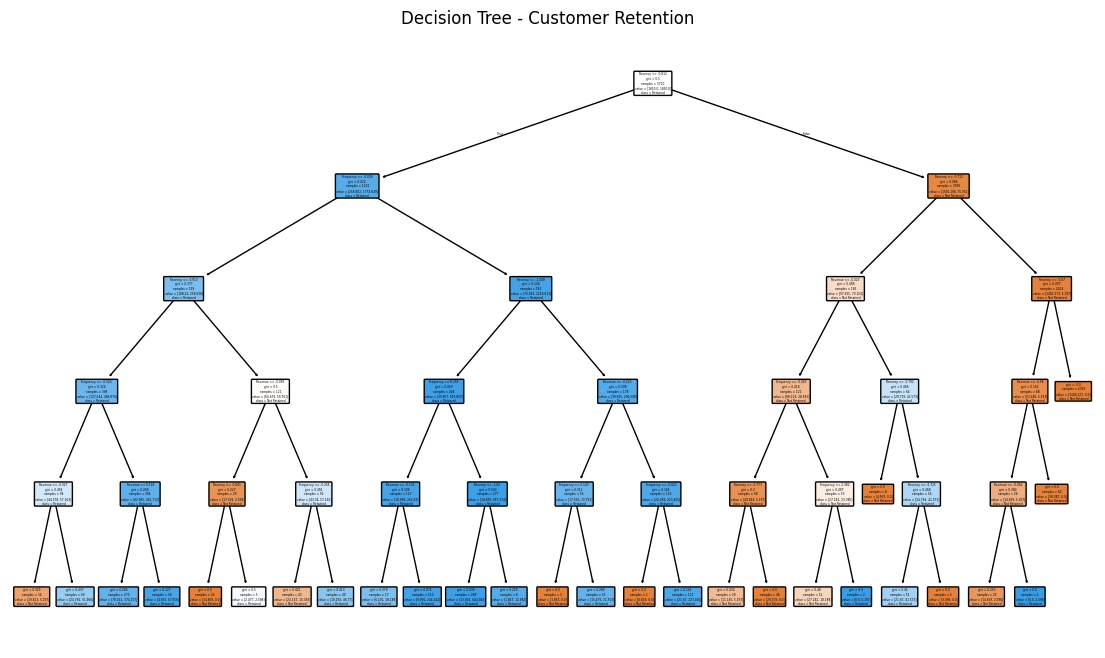

In [ ]:
# Classification Model: Predict Retention - Decision Tree

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import f1_score, roc_auc_score, classification_report
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_cls = ctm_dt.copy()

print("Before Preprocessing:")
print(df_cls.head())
print("\nMissing Values Before:")
print(df_cls.isnull().sum())

df_cls = df_cls.fillna(df_cls.median(numeric_only=True))

#labeling data : retension
df_cls['IsRetained'] = (df_cls['NextPurchaseDay'] <= 90).astype(int)

X = df_cls[['Recency', 'Frequency', 'Revenue', 'RecencyCluster', 'FrequencyCluster', 'RevenueCluster']]
y = df_cls['IsRetained']

#preprocess
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_preprocessed = pd.DataFrame(X_scaled, columns=X.columns)
print("\nAfter Preprocessing (Scaled Features):")
print(X_preprocessed.head())

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

dtc = DecisionTreeClassifier(
    criterion='gini',
    max_depth=5,
    min_samples_split=5,
    random_state=42,
    class_weight='balanced'
)
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)
y_proba = dtc.predict_proba(X_test)[:, 1]

f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

print(f"\nEvaluation Metric: F1-Score = {f1:.4f}")
print(f"Evaluation Metric: ROC-AUC Score = {roc_auc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


plt.figure(figsize=(14, 8))
plot_tree(dtc, filled=True, feature_names=X.columns, class_names=['Not Retained', 'Retained'], rounded=True)
plt.title("Decision Tree - Customer Retention  ")
plt.show()


In [ ]:
dtc.predict([[26,	3	,811	,2	,5490.606653	,2	]])

array([0])

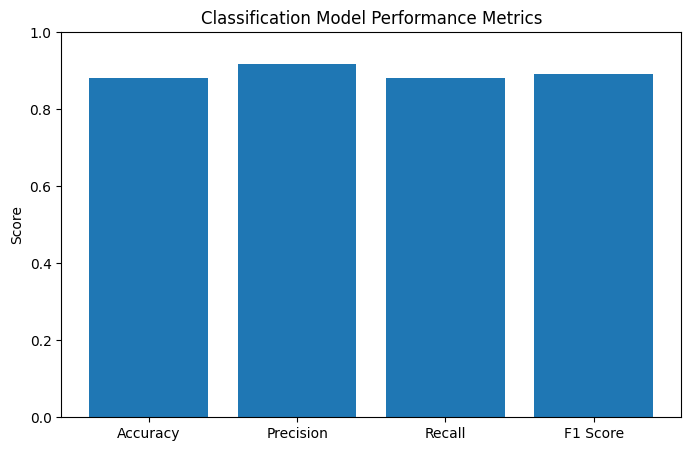

In [ ]:
import matplotlib.pyplot as plt

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(8,5))
plt.bar(metrics, values)
plt.ylim(0, 1)
plt.title('Classification Model Performance Metrics')
plt.ylabel('Score')
plt.show()


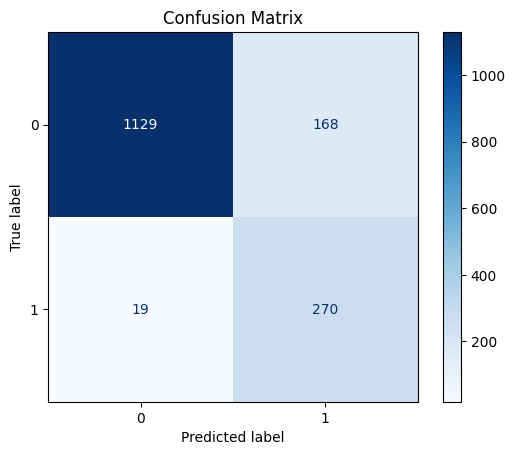

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()


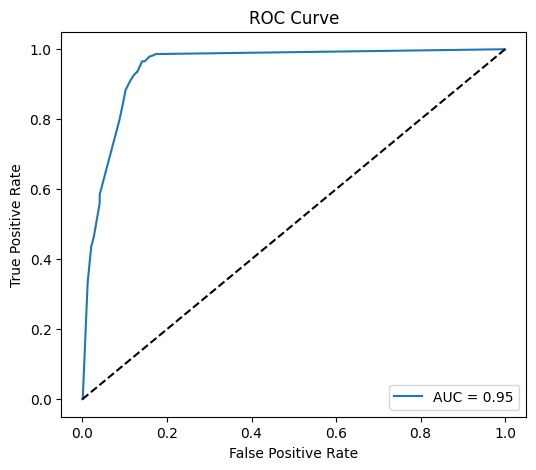

In [ ]:
from sklearn.metrics import roc_curve, auc

# Works only if model has predict_proba
y_probs = dtc.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


### Random Forest


===== Random Forest Model Evaluation =====
Accuracy: 0.8972
Precision: 0.9171
Recall: 0.8972
F1 Score: 0.9028
ROC-AUC Score: 0.9576

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.90      0.93      1297
           1       0.66      0.89      0.76       289

    accuracy                           0.90      1586
   macro avg       0.82      0.90      0.85      1586
weighted avg       0.92      0.90      0.90      1586



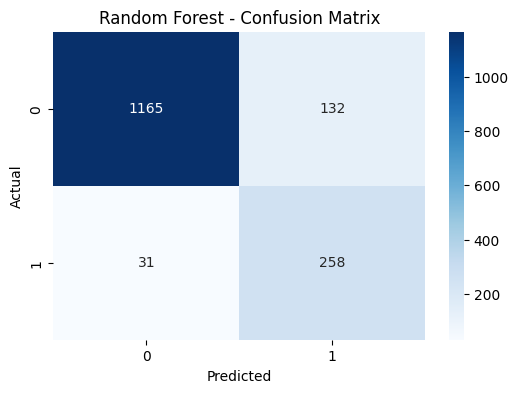

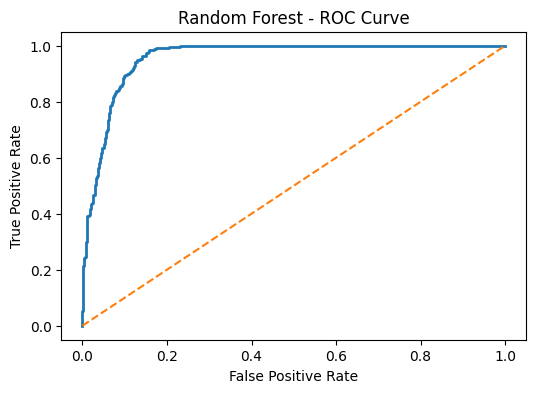

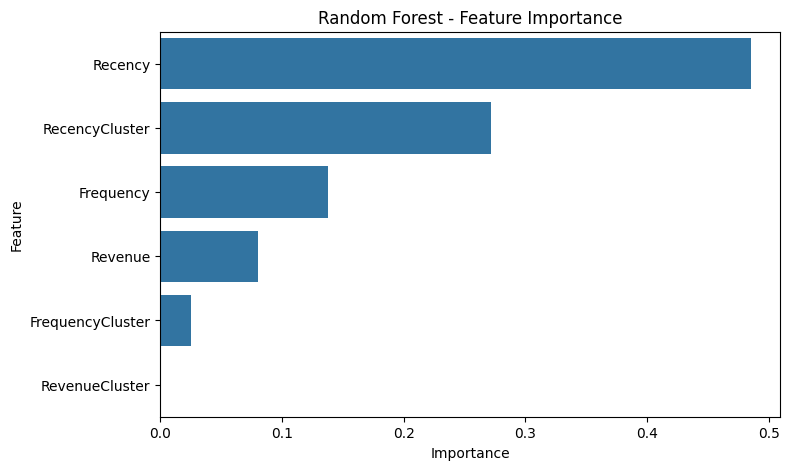

In [ ]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

X = df_cls[['Recency', 'Frequency', 'Revenue', 'RecencyCluster', 'FrequencyCluster', 'RevenueCluster']]
y = df_cls['IsRetained']

X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    random_state=42,
    class_weight='balanced'
)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
roc_auc_rf = roc_auc_score(y_test, y_proba_rf)

print("\n===== Random Forest Model Evaluation =====")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1 Score: {f1_rf:.4f}")
print(f"ROC-AUC Score: {roc_auc_rf:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Blues")
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

fpr, tpr, _ = roc_curve(y_test, y_proba_rf)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title("Random Forest - ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title("Random Forest - Feature Importance")
plt.show()


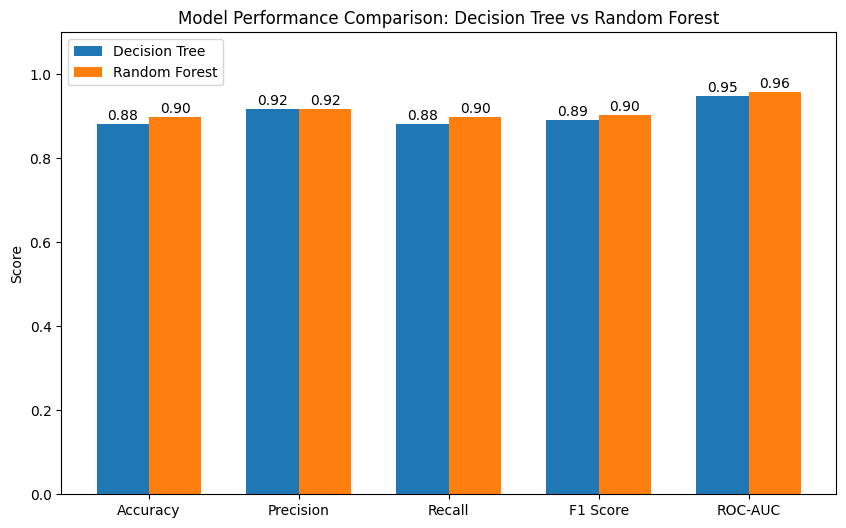

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC-AUC']

decision_tree_scores = [accuracy, precision, recall, f1, roc_auc]
random_forest_scores = [accuracy_rf, precision_rf, recall_rf, f1_rf, roc_auc_rf]

x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(10, 6))
bar1 = plt.bar(x - width/2, decision_tree_scores, width, label='Decision Tree')
bar2 = plt.bar(x + width/2, random_forest_scores, width, label='Random Forest')

for bar in bar1 + bar2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f"{yval:.2f}", ha='center')

plt.xticks(x, metrics)
plt.ylim(0, 1.1)
plt.ylabel("Score")
plt.title("Model Performance Comparison: Decision Tree vs Random Forest")
plt.legend()
plt.show()


## Apriori Algo

In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

df_apriori = df.copy()

df_apriori = df_apriori.dropna(subset=["Invoice", "Description"])
df_apriori["Description"] = df_apriori["Description"].astype(str)

# Grouping items per invoice
basket = df_apriori.groupby("Invoice")["Description"].apply(list).reset_index(name="Items")

# One-hot encoding
te = TransactionEncoder()
te_ary = te.fit(basket["Items"]).transform(basket["Items"])
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

frequent_itemsets = apriori(df_encoded, min_support=0.02, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

frequent_itemsets = frequent_itemsets.sort_values(by="support", ascending=False)
rules = rules.sort_values(by="lift", ascending=False)

print("\nTop Frequent Itemsets:")
print(frequent_itemsets.head().style.format({"support": "{:.4f}"}))

print("\nTop Association Rules:")
print(
    rules[["antecedents", "consequents", "support", "confidence", "lift"]]
    .head()
    .style.format({"support": "{:.4f}", "confidence": "{:.4f}", "lift": "{:.4f}"})
)



Top Frequent Itemsets:

Top Association Rules:


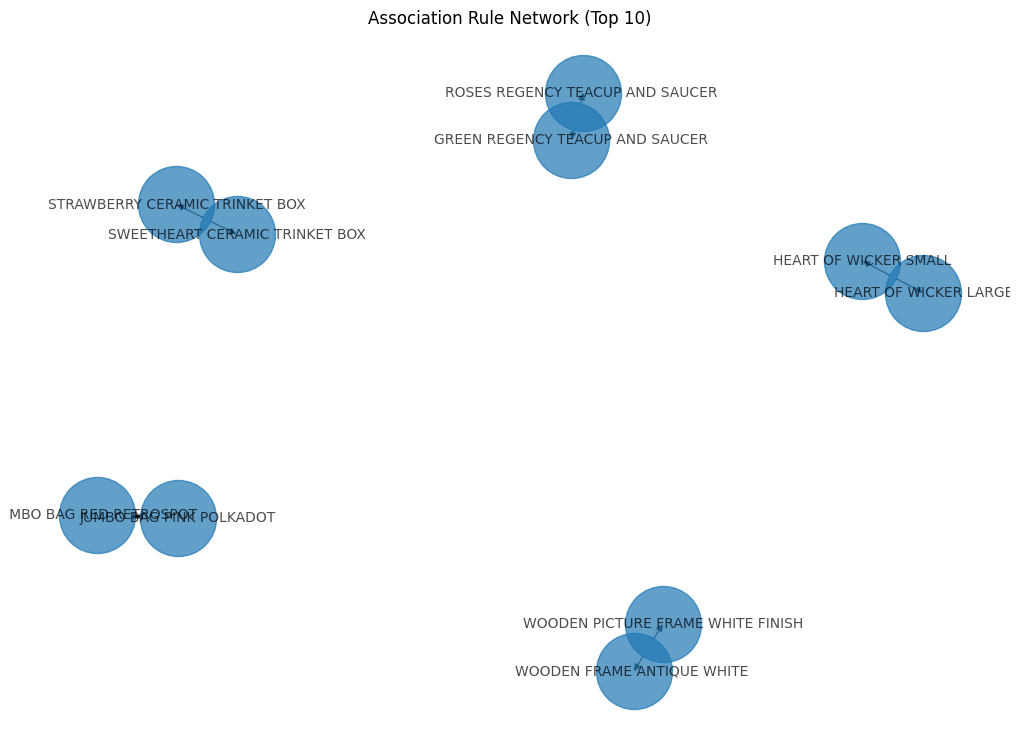

In [ ]:
#network graph that shows top 10 related items
import networkx as nx

G = nx.DiGraph()

top_rules = rules.head(10)

for _, row in top_rules.iterrows():
    for a in row['antecedents']:
        for c in row['consequents']:
            G.add_edge(a, c, weight=row['lift'])

plt.figure(figsize=(10,7))
pos = nx.spring_layout(G, k=1)
nx.draw(G, pos, with_labels=True, node_size=3000, font_size=10, alpha=0.7)
plt.title("Association Rule Network (Top 10)")
plt.show()

In [ ]:
basket.head()

,Invoice,Items
0,489434,"[15CM CHRISTMAS GLASS BALL 20 LIGHTS, PINK CHE..."
1,489435,"[CAT BOWL , DOG BOWL , CHASING BALL DESIGN, HE..."
2,489436,"[DOOR MAT BLACK FLOCK , LOVE BUILDING BLOCK WO..."
3,489437,"[CHRISTMAS CRAFT HEART DECORATIONS, CHRISTMAS ..."
4,489438,"[DINOSAURS WRITING SET , SET OF MEADOW FLOWE..."


## Model Comparison

The classification model performs efficiently based on ROC-AUC score of 0.948 which shows ability to distinguish retained vs non-retained customers. Although precision for retained customers is lower, the recall is high here, as in the model will successfully identify most customers who are at risk and will be important for retension strategy

Apriori : In apriori we get a lift of 10 which indicates that it has a very strong relation with certain products and have a chance that they are purchased together. This model can give recommended products to the users based on the item selected

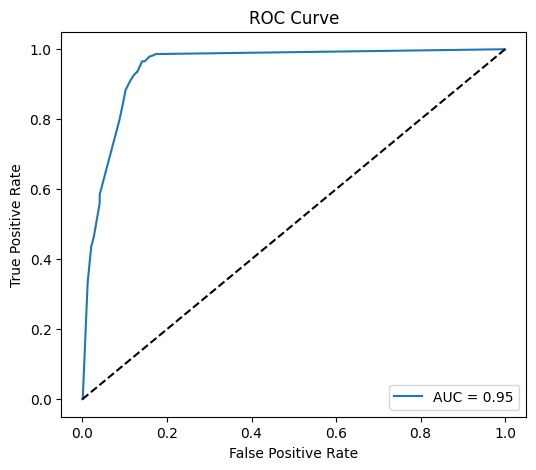

In [ ]:
from sklearn.metrics import roc_curve, auc
y_probs = dtc.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

Comparing Classification models

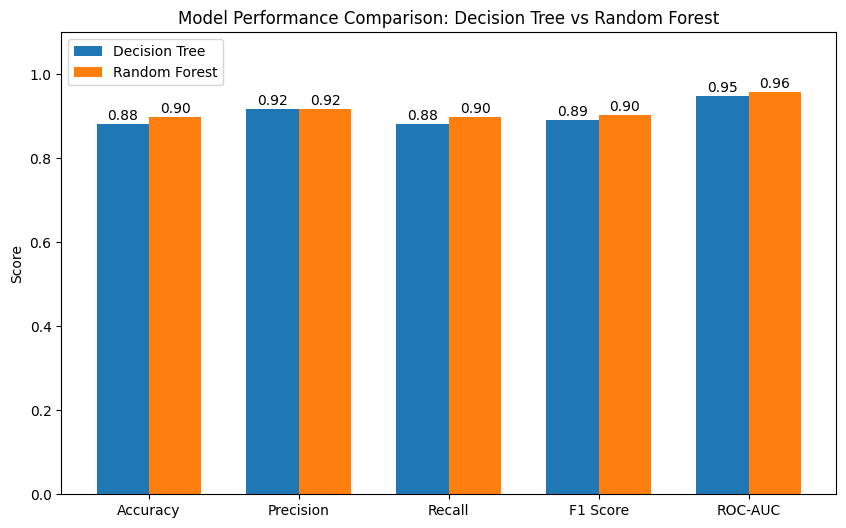

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC-AUC']

decision_tree_scores = [accuracy, precision, recall, f1, roc_auc]
random_forest_scores = [accuracy_rf, precision_rf, recall_rf, f1_rf, roc_auc_rf]

x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(10, 6))
bar1 = plt.bar(x - width/2, decision_tree_scores, width, label='Decision Tree')
bar2 = plt.bar(x + width/2, random_forest_scores, width, label='Random Forest')

for bar in bar1 + bar2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f"{yval:.2f}", ha='center')

plt.xticks(x, metrics)
plt.ylim(0, 1.1)
plt.ylabel("Score")
plt.title("Model Performance Comparison: Decision Tree vs Random Forest")
plt.legend()
plt.show()


The perfomance comparison between decision tree and random forest clearly shows that Random Forest outperforms Decision Tree in every aspect : accuracy, precision, recall. The graph highlights the improvements due to ensemble learning. This tell that Random Forest is more reliable for retaintion classification in Retail Analysis

# Results

In [ ]:
df_result = pd.read_csv("/content/retail_combined.csv")
df_result.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [ ]:
df_result.rename(columns={'Invoice':'InvoiceNo', 'Customer ID':'CustomerID', 'Price':'UnitPrice'}, inplace=True)
df_result.head()

df_result['InvoiceDate'] = pd.to_datetime(df_result['InvoiceDate'])
df_result['Revenue'] = df_result['Quantity'] * df_result['UnitPrice']

### Kmeans and Classification results, predicts the clusters for RFM and then classifies if the customer is reatined or not

In [ ]:
def predict_customer_retention(df_result, customer_id, number_of_clusters=4):
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_score, davies_bouldin_score
    from sklearn.model_selection import train_test_split
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.preprocessing import StandardScaler

    df_result['InvoiceDate'] = pd.to_datetime(df_result['InvoiceDate'])
    df_result['Revenue'] = df_result['Quantity'] * df_result['UnitPrice']

    ctm_bhvr_dt = df_result[(df_result.InvoiceDate < "2011-09-01") &
                             (df_result.InvoiceDate >= "2009-12-01")].reset_index(drop=True)

    ctm_next_quarter = df_result[(df_result.InvoiceDate < "2011-12-01") &
                                 (df_result.InvoiceDate >= "2011-09-01")].reset_index(drop=True)

    ctm_dt = pd.DataFrame(ctm_bhvr_dt['CustomerID'].unique(), columns=['CustomerID'])
    ctm_1st = ctm_next_quarter.groupby('CustomerID')['InvoiceDate'].min().reset_index()
    ctm_1st.columns = ['CustomerID','MinPurchaseDate']
    ctm_last = ctm_bhvr_dt.groupby('CustomerID')['InvoiceDate'].max().reset_index()
    ctm_last.columns = ['CustomerID','MaxPurchaseDate']
    ctm_purchase_dates = pd.merge(ctm_last, ctm_1st, on='CustomerID', how='left')
    ctm_purchase_dates['NextPurchaseDay'] = (ctm_purchase_dates['MinPurchaseDate'] -
                                             ctm_purchase_dates['MaxPurchaseDate']).dt.days
    ctm_dt = pd.merge(ctm_dt, ctm_purchase_dates[['CustomerID','NextPurchaseDay']],
                      on='CustomerID', how='left').fillna(9999)
    ctm_last['Recency'] = (ctm_last['MaxPurchaseDate'].max() - ctm_last['MaxPurchaseDate']).dt.days
    ctm_dt = pd.merge(ctm_dt, ctm_last[['CustomerID','Recency']], on='CustomerID')
    freq = df_result.groupby('CustomerID')['InvoiceDate'].count().reset_index()
    freq.columns = ['CustomerID', 'Frequency']
    kmeans_f = KMeans(n_clusters=number_of_clusters, random_state=42)
    freq['FrequencyCluster'] = kmeans_f.fit_predict(freq[['Frequency']])
    ctm_dt = pd.merge(ctm_dt, freq, on='CustomerID')
    rev = df_result.groupby('CustomerID')['Revenue'].sum().reset_index()
    ctm_dt = pd.merge(ctm_dt, rev, on='CustomerID')

    kmeans_r = KMeans(n_clusters=number_of_clusters, random_state=42)
    ctm_dt['RevenueCluster'] = kmeans_r.fit_predict(ctm_dt[['Revenue']])
    kmeans_rec = KMeans(n_clusters=number_of_clusters, random_state=42)
    ctm_dt['RecencyCluster'] = kmeans_rec.fit_predict(ctm_dt[['Recency']])
    ctm_dt['IsRetained'] = (ctm_dt['NextPurchaseDay'] <= 90).astype(int)
    X = ctm_dt[['Recency', 'Frequency', 'Revenue',
                'RecencyCluster', 'FrequencyCluster', 'RevenueCluster']]
    y = ctm_dt['IsRetained']

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=42, test_size=0.3)
    model = DecisionTreeClassifier(max_depth=5, class_weight='balanced', random_state=42)
    model.fit(X_train, y_train)

    customer_row = ctm_dt[ctm_dt['CustomerID'] == customer_id]

    if customer_row.empty:
        return f"Customer {customer_id} does not exist in dataset."

    customer_features = scaler.transform(customer_row[['Recency', 'Frequency', 'Revenue',
                                                       'RecencyCluster','FrequencyCluster','RevenueCluster']])

    pred = model.predict(customer_features)[0]
    label = "Retained" if pred == 1 else "Not Retained"

    return {
        "CustomerID": customer_id,
        "RFM_Values": customer_row[['Recency','Frequency','Revenue']].to_dict(orient='records')[0],
        "Clusters": customer_row[['RecencyCluster','FrequencyCluster','RevenueCluster']].to_dict(orient='records')[0],
        "Prediction": label
    }, ctm_dt


In [ ]:
import json

result, ctm_df = predict_customer_retention(df_result, customer_id=13078)
print("\n----- Customer Prediction Result -----\n")
print(json.dumps(result, indent=4))


----- Customer Prediction Result -----

{
    "CustomerID": 13078,
    "RFM_Values": {
        "Recency": 0,
        "Frequency": 855,
        "Revenue": 28883.83
    },
    "Clusters": {
        "RecencyCluster": 0,
        "FrequencyCluster": 3,
        "RevenueCluster": 0
    },
    "Prediction": "Retained"
}


### Regression predictions : to predict estimated days after which that particular customer will place an order



In [ ]:
def predict_next_purchase(df, customer_id):
    from sklearn.model_selection import train_test_split
    from sklearn.ensemble import RandomForestRegressor
    import numpy as np
    import pandas as pd

    df_reg = df[df['NextPurchaseDay'] != 9999].copy()

    X = df_reg[['Recency', 'Frequency', 'Revenue']]
    y = df_reg['NextPurchaseDay']

    rfr = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
    rfr.fit(X, y)
    customer_row = df[df['CustomerID'] == customer_id]

    if customer_row.empty:
        return f"Customer ID {customer_id} not found."

    customer_features = customer_row[['Recency', 'Frequency', 'Revenue']]

    predicted_days = float(rfr.predict(customer_features)[0])

    return {
        "CustomerID": int(customer_id),
        "Recency": float(customer_row['Recency'].iloc[0]),
        "Frequency": float(customer_row['Frequency'].iloc[0]),
        "Revenue": float(customer_row['Revenue'].iloc[0]),
        "Predicted_Next_Purchase_Day": round(predicted_days, 2)
    }


In [ ]:
prediction = predict_next_purchase(ctm_df, 13078)
print(prediction)

{'CustomerID': 13078, 'Recency': 0.0, 'Frequency': 855.0, 'Revenue': 28883.83, 'Predicted_Next_Purchase_Day': 11.69}


### Apriori Prediction

In [123]:
import pandas as pd
from collections import Counter

def recommend(query):
    try:
        df = pd.read_csv('/content/retail_combined.csv')
        df.rename(columns={'Invoice':'InvoiceNo', 'Customer ID':'CustomerID', 'Price':'UnitPrice'}, inplace=True)
        df = df.dropna()
        df.InvoiceDate = pd.to_datetime(df.InvoiceDate)
        df = df[(df['UnitPrice'] > 0) & (df['Quantity'] > 0)]
        df['StockCode'] = df['StockCode'].astype(str).str[:-1]  # remove trailing char

        product_df = df.groupby(['StockCode', 'Description']).Quantity.sum().reset_index()
        product_df.StockCode = product_df.StockCode.apply(lambda x: x if x.isdigit() else None)
        product_df = product_df.dropna()

        product_lookup = {}
        for _, row in product_df.iterrows():
            if row["StockCode"] not in product_lookup:
                product_lookup[row["StockCode"]] = row["Description"]

        word_index = {code: desc.lower().split() for code, desc in product_lookup.items()}

        def get_stockcode(words):
            for sc, wordlist in word_index.items():
                if set(words).issubset(set(wordlist)):
                    return sc
            return None

        baskets = df.groupby("InvoiceNo")["StockCode"].apply(list).tolist()
        baskets = [b for b in baskets if len(b) <= 50]  # remove large carts
        words = query.lower().split()
        sc = get_stockcode(words)

        if not sc:
            return f"No matching product found for: '{query}'"
        co_items = []
        for basket in baskets:
            if sc in basket:
                co_items.extend([item for item in basket if item != sc])

        if not co_items:
            return f"No recommendations available for: '{query}'"

        ranked = Counter(co_items).most_common()
        result_lines = []
        seen = set()

        for product, count in ranked:
            if product in product_lookup and product_lookup[product] not in seen:
                result_lines.append(f"{len(result_lines)+1}. {product_lookup[product]} ({count} purchases)")
                seen.add(product_lookup[product])

            if len(result_lines) == 10:
                break
        output = f'Because users bought "{query}", they also frequently purchased:\n' + "\n".join(result_lines)
        return output

    except Exception as e:
        return f"Error: {e}"


In [124]:
print(recommend("BAG"))

Because users bought "BAG", they also frequently purchased:
1. CHARLOTTE BAG ALPHABET  DESIGN (10 purchases)
2. BLUE POLKADOT PURSE  (9 purchases)
3. ALPHABET HEARTS STICKER SHEET (8 purchases)
4. BLUE SPOT CERAMIC DRAWER KNOB (7 purchases)
5. 11 PC CERAMIC TEA SET POLKADOT (6 purchases)
6. BLUE HARMONICA IN BOX  (6 purchases)
7. FUNKY MONKEY GIFT BAG MEDIUM (6 purchases)
8. BLUE PATCH PENCIL CASE PINK HEART (6 purchases)
9. FLOWERS TILE HOOK (6 purchases)
10. BLUE BREAKFAST CUP AND SAUCER  (6 purchases)
